# Data structuring, part 2

### The Pandas way

*Andreas Bjerre-Nielsen*

## Recap

*What do we know about explanatory plotting?*

- ...
- ...

*What do we know about exploratory plotting?*

- ...

## Motivation
*Reminder: Why do we want to learn data structuring?*

- ..
- ..

## Agenda
We will learn about new data types 
1. [string  data](#String-data)
1. [temporal data](#Temporal-data)
1. [missing data](#Missing-data) 
1. [useful tools](#Useful-tools)

## Loading the software

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# String data

## String operations vectorized (1)
*Quiz: Which operators could work for string?*

Operators **+**, **+=**. Example:

In [4]:
str_ser1 = pd.Series(['Andreas', 'Snorre', 'Ulf'])

In [5]:
str_ser1 + ' works @ SODAS'

0    Andreas works @ SODAS
1     Snorre works @ SODAS
2        Ulf works @ SODAS
dtype: object

## String operations vectorized (2)
Addition also work for two series

In [6]:
# adding two series together is also possible
str_ser2 = pd.Series(['Bjerre-Nielsen', 'Ralund', 'Aslak'])
# str_ser1 + str_ser2 

## String operations vectorized (3)
The powerful .str has several powerful methods e.g. `contains`, `capitalize`. Example:

In [7]:
str_ser1.str.upper()
# str_ser1.str.contains('M')

0    ANDREAS
1     SNORRE
2        ULF
dtype: object

## String operations vectorized (4)

The .str methods include slicing - example: 

In [8]:
str_ser2.str[0]

0    B
1    R
2    A
dtype: object

## String operations vectorized (5)

Many more `str` methods in pandas,
- most basic strings methods translate directly
- see Table 7-5 in PDA for an overview


## Categorical data type (1)
*Are string columns smart for storage and speed?*

No, sometimes it is better to convert to categorical data type:
- use categorical when many characters and repeated.

## Categorical data type (2)
*How do we convert to categorical?*

In [9]:
edu_list = ['B.Sc. Political Science', 'Secondary school'] + ['High school']*2
edu_cats = ['Secondary school', 'High school', 'B.Sc. Political Science']
str_ser3 = pd.Series(edu_list)

# option 1
cats = pd.Categorical(str_ser3, categories=edu_cats, ordered=True)
cat_ser = pd.Series(cats, index=str_ser3)

# option 2 - no order - fast
cat_ser2 = str_ser3.astype('category')

## Categorical data type (3)
*How do we work with categorical data?*

- Using the `cat` attribute of series. Has a few methods. E.g. `.cat.codes`

In [10]:
print(cat_ser)
print()
print(cat_ser.cat.codes)

B.Sc. Political Science    B.Sc. Political Science
Secondary school                  Secondary school
High school                            High school
High school                            High school
dtype: category
Categories (3, object): [Secondary school < High school < B.Sc. Political Science]

B.Sc. Political Science    2
Secondary school           0
High school                1
High school                1
dtype: int8


*Why categorical?*

- 

- 

# Temporal data

## Temporal data type (1)

*Why is time so fundamental?*


Every measurement made by humans was made at a point in time, therefore it has a "timestamp".

## Temporal data type (2)
*How are timestamps  measured?*

1. Datetime (ISO 8601): standard calendar 
  - year, month, day: minute, second, miliseconds etc. [timezone]
  - comes as strings in raw data
2. Epoch time: seconds since January 1, 1970 - 00:00, GMT.
  - nanoseconds in pandas

## Temporal data type (3)

*Does Pandas store it in a smart way?*


Pandas has native support for temporal data combining datetime and epoch time. 

In [11]:
str_ser4 = pd.Series(['20170101', '20170727', '20170803', '20171224'])
dt_ser1 = pd.to_datetime(str_ser4)
print(dt_ser1)

0   2017-01-01
1   2017-07-27
2   2017-08-03
3   2017-12-24
dtype: datetime64[ns]


## Time series (1)
*Why is temporal data powerful?*

We can easily make and plot time series.

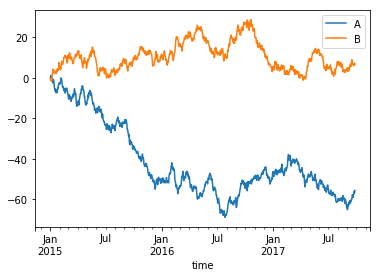

In [12]:
T = 1000
data = {v:np.cumsum(np.random.randn(T)) for v in ['A', 'B']}
data['time'] = pd.date_range(start='20150101', freq='D', periods=T)
ts_df = pd.DataFrame(data)

ts_df.set_index('time').plot()

## Time series (2)
*Why is pandas good at time data?*

It handles irregular data well: 
- missing values;
- duplicate entries. 

It has specific tools for resampling and interpolating data
- See 11.3, 11.5, 11.6 in PDA book. 

## Datetime variables (1)
*What other uses might time data have?*

We can extract data from datetime columns. These columns have the `dt` attribute and its sub-methods. Example:

In [ ]:
dt_ser2 = ts_df.time
#dt_ser2.dt.day.head(3)
#dt_ser2.dt.month.head(3)

## Datetime variables (2)
The `dt` sub-methods include `year`,  `weekday`, `hour`, `second`.

*To note:* Your temporal data may need conversion. `dt` includes `tz_localize` and `tz_convert` which does that. 

## Datetime variables (3)
*Quiz: What are you to do if get time data with numbers of around 1-2 billion?*

It is likely to be epoch time measured in seconds. We can convert it as follows:

In [ ]:
pd.to_datetime([123512321,2132321321], unit='s')

# Missing data

## Missing data type (1)
*Which data type have we not covered yet?*

Missing data, i.e. empty observations.
- In python: `None`
- In pandas:  numpy's 'Not a Number', abbreviated `NaN` or `nan`

## Missing data type (2)
*What does a DataFrame with missing data look like?*

In [ ]:
nan_data = [[1,np.nan,3],
            [4,5,None],
            [7,8,9]]
nan_df = pd.DataFrame(nan_data, columns=['A','B','C'])
print(nan_df)

## Handling missing data
*What options do we in working with missing data?*

1. Ignore the problem
2. Drop missing data: columns and/or rows
3. Fill in the blanks
4. If time and money permits: collect the data or new data

## Removing missing data (1)
*How do we remove data?*

Using the `dropna` method.

In [ ]:
nan_df.dropna() # subset=['B'], axis=1

## Filling missing data (1)
*How do we fill observations with a constant?*

In [ ]:
nan_df.fillna(0)

Note: we can also select missing `isnull` and the replace values using `loc`.

## Filling missing data (2)
*Are there other methods?*


Yes, many methods:
- Filling sorted temporal data, see `ffill`, `bfill`
- Filling with a model 
    - e.g. linear interpolation, by mean of nearest observations etc.
    - `sklearn` in next week can impute data

# Useful tools

## Duplicates in data (1)
*What does it mean there are duplicates in the data?*

...

## Duplicates in data (2)
*How do we drop duplicates?*

In [ ]:
str_ser3.drop_duplicates()

## Duplicates in data (3)
*How do we use duplicates?*

Tomorrow morning we will get introduced to groupby which can be used to compute various statistics (e.g. mean, median)

## Binning numerical data
*Can we convert our numerical data to bins in a smart way?*

Yes, to methods are useful: 
- `cut` which divides data by user specified bins
- `qcut` which divides data by user specified quantiles (e.g. median, q=0.5)

In [ ]:
x = pd.Series(np.random.normal(size=10**6))
cat_ser3 = pd.qcut(x, q=[0,.95,1])
cat_ser3.cat.categories

## Other tricks
Pandas is packed with smart tools
- we can create dummy variables from categorical with `to_dummies`
- we can combine many of the tools we have learned with `groupby` (tomorrow)

# The end

[Return to agenda](#Agenda)